<h1 align='center'>Kruskal’s Minimum Spanning Tree (MST) Algorithm </h1>

In [29]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.vertices = set()
        self.edges = []
        self.adjacency_list = {}

    def add_vertex(self, vertex):
        self.vertices.add(vertex)
        self.adjacency_list[vertex] = []

    def add_edge(self, start, end, weight):
        self.edges.append((weight, start, end))
        
        if end not in self.adjacency_list[start]:
            self.adjacency_list[start].append((end, weight))
            
        if start not in self.adjacency_list[end]:
            self.adjacency_list[end].append((start, weight))


    def Display(self):
        G = nx.Graph()
        G.add_nodes_from(self.vertices)
    
        for edge in self.edges:
            G.add_edge(edge[1], edge[2], weight=edge[0])
    
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
                font_color='black', font_size=10, font_family='sans-serif', edge_color='gray', width=1, edge_cmap=plt.cm.Blues)
    
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
        plt.show()

    def Kruskal_Algorithm(self):
        MST = set()
        edges = sorted(self.edges, key=lambda x: x[0])
        parent = {vertex: vertex for vertex in self.vertices}

        def find(node):
            if parent[node] != node:
                parent[node] = find(parent[node])
            return parent[node]

        def union(node1, node2):
            root1 = find(node1)
            root2 = find(node2)
            parent[root1] = root2

        for edge in edges:
            weight, vertex1, vertex2 = edge
            if find(vertex1) != find(vertex2):
                MST.add((vertex1, vertex2, weight))
                union(vertex1, vertex2)

        return MST

    def Display_Kruskal_Algorithm(self):
        mst_edges = self.Kruskal_Algorithm()
        G = nx.Graph()

        for edge in mst_edges:
            G.add_edge(edge[0], edge[1], weight=edge[2])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
                font_color='black', font_size=10, font_family='sans-serif', edge_color='green', width=2, edge_cmap=plt.cm.Greens)

        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

        plt.show()



### Example usage

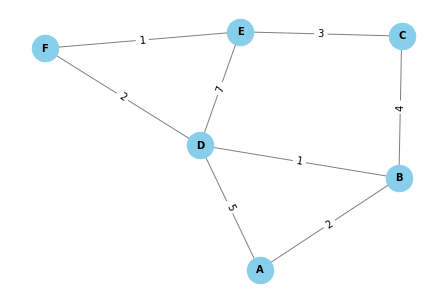

In [30]:
graph = Graph()
vertices = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B', 2), ('A', 'D', 5), ('B', 'C', 4), ('B', 'D', 1), ('C', 'E', 3), ('D', 'E', 7), ('D', 'F', 2), ('E', 'F', 1)]
for vertex in vertices:
    graph.add_vertex(vertex)

for edge in edges:
    graph.add_edge(*edge)

graph.Display()



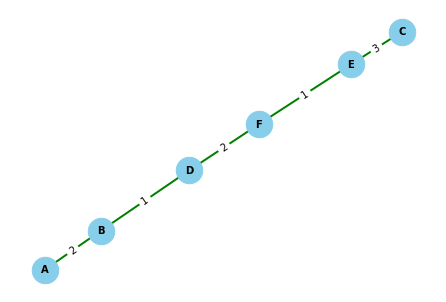

In [31]:
graph.Display_Kruskal_Algorithm()

### Another Example usage

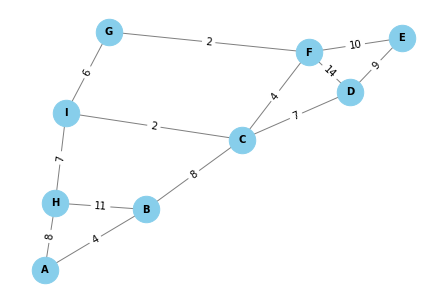

In [32]:
# Adding edges
graph = Graph()
vertices = ['A', 'B', 'H', 'C', 'D', 'F', 'I', 'E', 'G']

for vertex in vertices:
    graph.add_vertex(vertex)

edges = [
    ('A', 'B', 4),
    ('A', 'H', 8),
    ('B', 'C', 8),
    ('B', 'H', 11),
    ('C', 'D', 7),
    ('C', 'F', 4),
    ('C', 'I', 2),
    ('D', 'E', 9),
    ('D', 'F', 14),
    ('E', 'F', 10),
    ('F', 'G', 2),
    ('G', 'I', 6),
    ('H', 'I', 7)
]

# Note the change in the way edges are added
for edge in edges:
    graph.add_edge(edge[0], edge[1], edge[2])
    #graph.add_edge(*edge)
graph.Display()

In [33]:
graph.Kruskal_Algorithm()

{('A', 'B', 4),
 ('A', 'H', 8),
 ('C', 'D', 7),
 ('C', 'F', 4),
 ('C', 'I', 2),
 ('D', 'E', 9),
 ('F', 'G', 2),
 ('H', 'I', 7)}

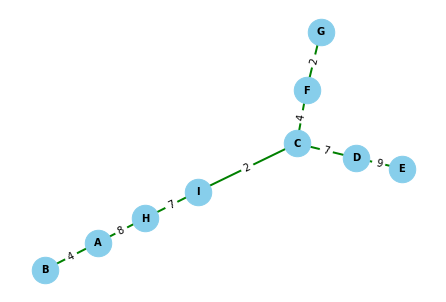

In [34]:
graph.Display_Kruskal_Algorithm()